## Business Context
#### Pharmaceutical companies invest millions of dollars in clinical trials to test drug efficacy. However, some drugs do not work for all patients due to individual differences in biology, metabolism, and pre-existing conditions.
#### Traditional clinical trials take years to conclude, with high costs and risks.
#### Machine learning models can help predict drug response early, saving time and resources.
#### Personalized medicine ensures that patients receive the right drug at the right dose.
-------------------------------------------------------------------------------------------------------------------------------
#### Drug Response Classification (0 = No response, 1 = Positive response)
#### Drug response classification refers to how a patient’s body reacts to a particular drug. This is a key concept in pharmaceutical research and clinical trials, where researchers analyze whether a drug is effective or not based on biological responses.
#### Interpretation of Classification Labels:
1.	0 = No Response
    - The drug did not have a significant effect on the patient.
    - The patient’s condition remained unchanged after taking the drug.
    - The biomarkers (e.g., blood pressure, glucose level, heart rate) did not improve.
    - Possible reasons:
        - The drug is not suitable for the patient.
        - The dosage is ineffective.
        - The patient's metabolism is resistant to the drug.
2.	1 = Positive Response
    - The drug had a beneficial effect on the patient.
    - The patient’s condition improved after taking the drug.
    - Biomarkers such as blood pressure, glucose levels, and enzyme activity show significant improvement.
    - Possible reasons:
        - The drug is effective for this patient.
        - The dosage is appropriate.
        - The patient’s metabolism responds well to the drug.



Why is This Classification Important?
* Pharmaceutical Industry: Used to test new drugs and evaluate their effectiveness before FDA approval.
* Personalized Medicine: Helps doctors prescribe drugs based on individual patient responses.
* Machine Learning in Healthcare: Enables predictive models to forecast patient responses based on medical data.
 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./Pharma_Industry.csv')
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


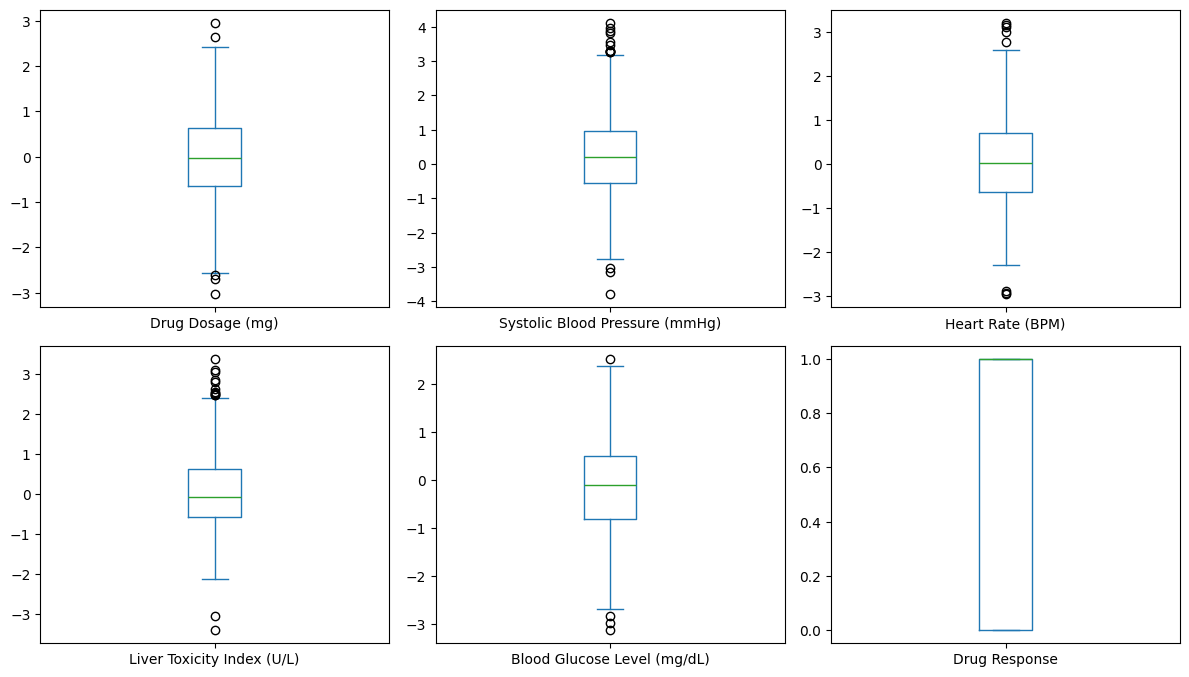

In [3]:
%matplotlib inline
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,10))
plt.tight_layout()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [6]:
# I have no idea should I remove these outliers or not because in real world pharmaceutical industry these outliers may represent important cases. So, I will keep them for now.

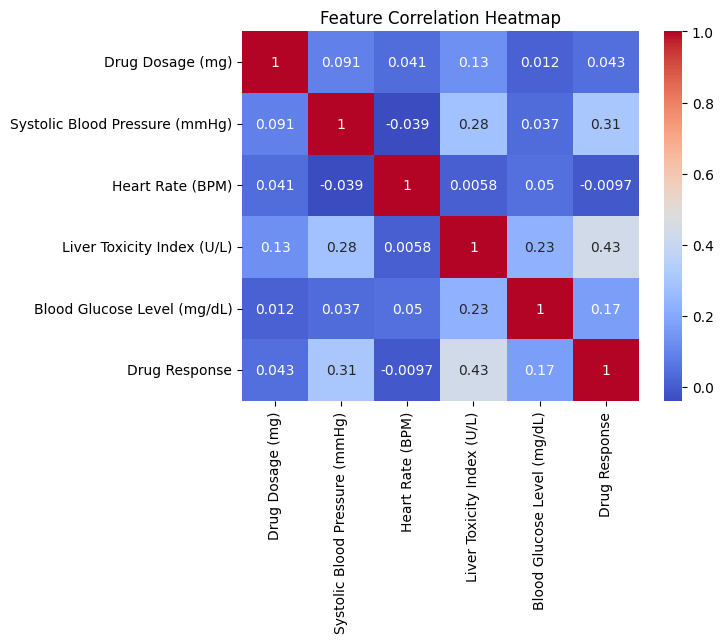

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
# As the dataset is clean, we can proceed to split the data into features and target variable, and then into training and testing sets.
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled

array([[ 0.27019356, -0.12558746,  0.49939541,  0.2584203 ,  0.72275073],
       [ 0.43653879, -0.93846959, -0.58035473, -0.25130946, -0.70828272],
       [ 0.00727936,  1.49116923, -0.98032298,  0.61973837,  1.15642532],
       ...,
       [-0.65735992, -0.51894055, -0.18946681,  0.83586946,  0.29719569],
       [-0.79638216, -0.09301487, -1.38328601, -1.15965592, -0.06817667],
       [ 0.01455599, -0.23309157, -0.35963987,  0.170283  , -0.13682836]])

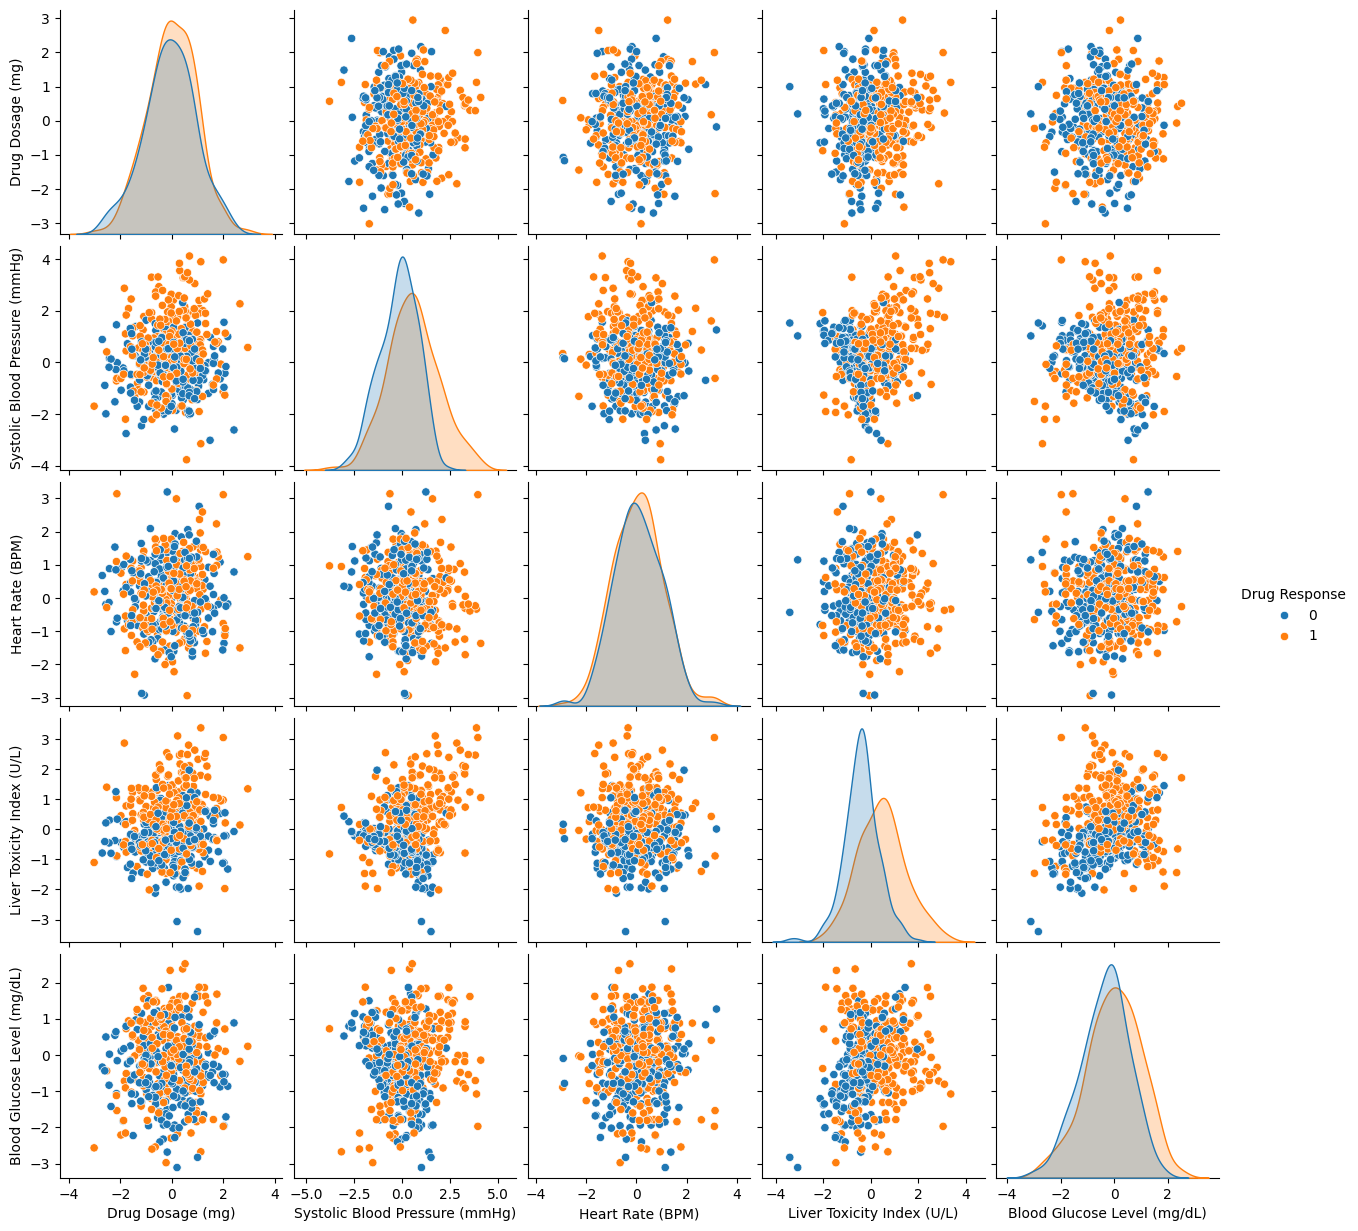

In [10]:
sns.pairplot(df, hue='Drug Response')
plt.show()

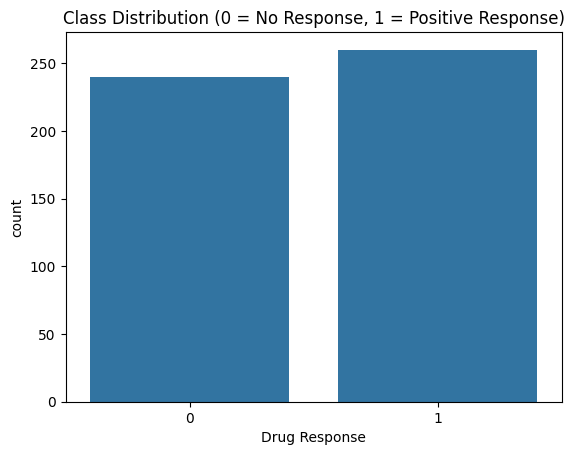

In [11]:
sns.countplot(x=y)
plt.title('Class Distribution (0 = No Response, 1 = Positive Response)')
plt.show()

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
svc=SVC()
param=[{"kernel":["linear","poly",'rbf'],
        "C": [0,0.1,0.001,1,0.5],
        "gamma": ['scale',10,0.5,0.10,0.25,1.5]}]
grid=GridSearchCV(estimator=svc,param_grid=param)
grid.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"[{'C': [0, 0.1, ...], 'gamma': ['scale', 10, ...], 'kernel': ['linear', 'poly', ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [13]:
grid.best_score_,grid.best_params_

(np.float64(0.7685714285714286), {'C': 1, 'gamma': 0.25, 'kernel': 'rbf'})

Kernel: linear, Accuracy: 0.6933
Kernel: poly, Accuracy: 0.6600
Kernel: rbf, Accuracy: 0.7200


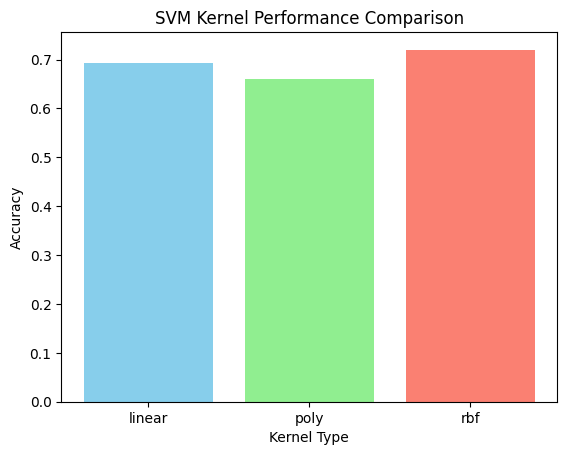

In [21]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    results[k] = acc
    print(f"Kernel: {k}, Accuracy: {acc:.4f}")

# Compare kernel performances visually
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

Testing Accuracy:  0.7266666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        67
           1       0.79      0.69      0.74        83

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.74      0.73      0.73       150

Accuracy: 0.7266666666666667
Precision: 0.7916666666666666
Recall: 0.6867469879518072
F1 Score: 0.7354838709677419


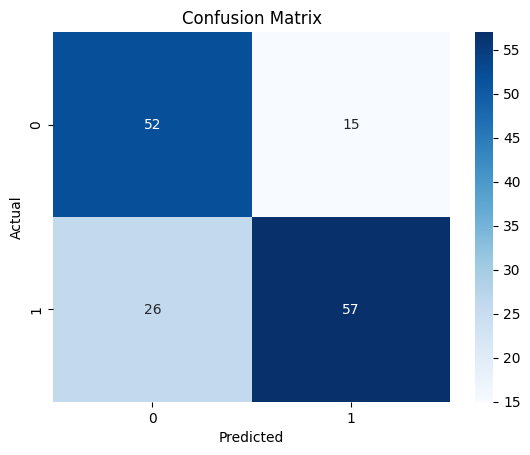

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

model = SVC(kernel='rbf', C=0.5, gamma=0.25, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




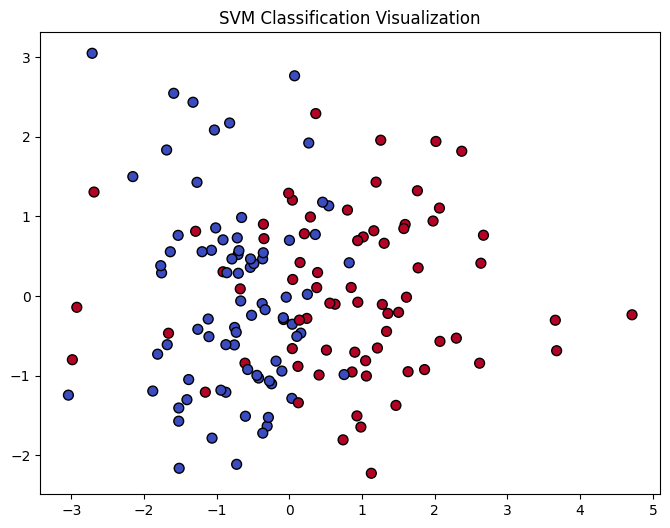

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred, cmap='coolwarm', s=50, edgecolor='k')
plt.title('SVM Classification Visualization')
plt.show()